Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. 

Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки: абонентская плата отсутствует, стоимость одной минуты поездки — 8 рублей; стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra: абонентская плата — 199 рублей в месяц; стоимость одной минуты поездки — 6 рублей; стоимость старта —бесплатно;

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

*Пользователи — users_go.csv*
- user_id -	уникальный идентификатор пользователя
- name - имя пользователя
- age -	возраст
- city - город
- subscription_type - тип подписки (free, ultra)

*Поездки — rides_go.csv*
- user_id -	уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки

*Подписки — subscriptions_go.csv*
- subscription_type - тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа

In [1]:
import pandas as pd

#### Шаг 1. Загрузка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

In [3]:
data_users = pd.read_csv('/datasets/users_go.csv')
display(data_users.head())
data_users.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
data_riders = pd.read_csv('/datasets/rides_go.csv')
display(data_riders.head())
data_riders.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
display(data_subscriptions.head())
data_subscriptions.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Вывод:
    
Загрузили и рассмотрели данные.

Датафрейм 'users_go' имеет 5 столбцов и 1565 строк без пропусков и выбросов.
Датафрейм 'rides_go' имеет 4 столбца и 18068 строк без пропусков и выбросов.
Датафрейм 'subscriptions_go' имеет 4 столбца и 2 строки без пропусков и выбросов.

#### Шаг 2. Предобработка данных

##### Приведем столбец date к типу даты pandas.

In [6]:
data_riders['date'] = pd.to_datetime(data_riders['date'], format = '%Y-%m-%d')
data_riders['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

##### Создадим новый столбец с номером месяца на основе столбца date.

In [7]:
data_riders['month'] = data_riders['date'].dt.month
data_riders['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

##### Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

In [8]:
data_users.duplicated().sum()

31

In [9]:
data_users.drop_duplicates(inplace=True)
data_users.duplicated().sum()

0

In [10]:
data_riders.duplicated().sum()

0

Добавили столбец "month" с номером месяца.
Удалили строки-дубликаты.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [11]:
count_of_users_by_city = data_users['city'].value_counts()
count_of_users_by_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [12]:
# Суммарное число пользователей, указанных в датафрейме.
count_of_users_by_city.sum()

1534

In [13]:
# Найдем процентное соотношение пользователей определенного города к общему числу пользователей
count_of_users_by_city['rate'] = round(data_users['city'].value_counts() / 
                                    count_of_users_by_city.sum(), 2) * 100
count_of_users_by_city['rate']

Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: city, dtype: float64

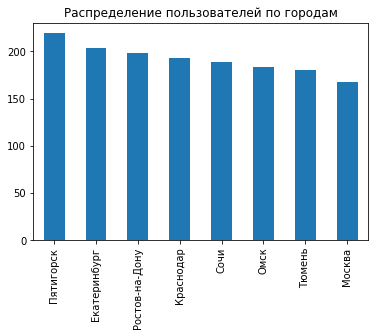

In [14]:
# Распределение пользователей по городам
data_users['city'].value_counts().plot(
    kind = 'bar', 
    y = count_of_users_by_city,
    title = 'Распределение пользователей по городам');

##### Соотношение пользователей с подпиской и без подписки

In [15]:
count_subscriptions = data_users['subscription_type'].value_counts()
count_subscriptions

free     835
ultra    699
Name: subscription_type, dtype: int64

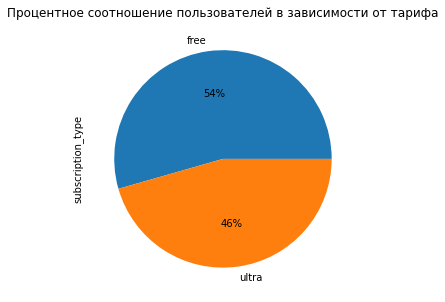

In [16]:
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = count_subscriptions, 
    autopct = '%1.0f%%', 
    figsize=(5,5),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

##### Возраст пользователей

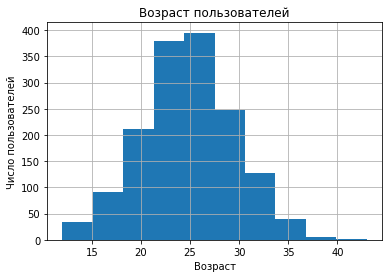

In [17]:
plt.hist(data_users['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Число пользователей')
plt.grid()
plt.show()

In [18]:
# Найдем младших пользователей
data_users['age'].sort_values().head()

664    12
66     12
727    12
34     12
235    13
Name: age, dtype: int64

In [19]:
# Найдем старших пользователей
data_users['age'].sort_values(ascending=False).head()

1201    43
961     39
804     38
453     38
383     38
Name: age, dtype: int64

In [20]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

##### Расстояние, которое пользователь преодолел за одну поездку

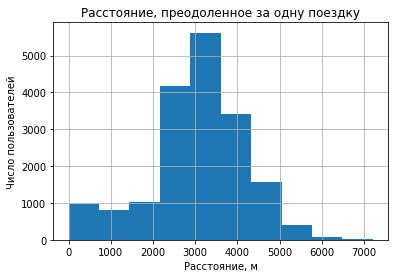

In [21]:
plt.hist(data_riders['distance'], bins = 10)
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Число пользователей')
plt.grid()
plt.show()

In [22]:
# Найдем самое длинное расстояние
data_riders['distance'].sort_values(ascending=False).head()

16309    7211.007745
16484    7066.003772
15580    6908.491343
17171    6760.940067
17242    6724.932981
Name: distance, dtype: float64

In [23]:
# Найдем самое короткое расстояние
data_riders['distance'].sort_values().head()

11555    0.855683
9541     2.570787
13690    4.329506
8658     6.784447
7841     7.097072
Name: distance, dtype: float64

##### Продолжительность поездок

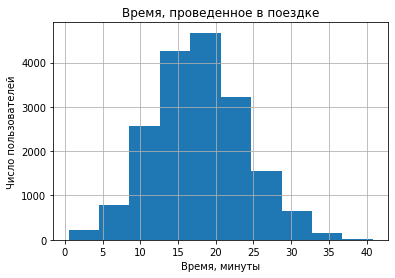

In [24]:
plt.hist(data_riders['duration'], bins = 10)
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, минуты')
plt.ylabel('Число пользователей')
plt.grid()
plt.show()

In [25]:
# Найдем самое маленькое время поездки
data_riders['duration'].sort_values().head()

12013    0.5
17314    0.5
15029    0.5
7437     0.5
12967    0.5
Name: duration, dtype: float64

In [26]:
# Найдем самое длинное время поездки
data_riders['duration'].sort_values(ascending=False).head()

4215    40.823963
4709    39.873856
2623    39.526602
1998    38.352763
6453    38.265229
Name: duration, dtype: float64

**Частота встречаемости городов**

Примерно одинаковое число пользователей по городам, нет выдающихся значений. 
Больше всего пользователей в Пятигорске. 
Меньше всего пользователей в Москве. 
Это может быть связано с тем, Москва больше Пятигорска и много людей предпочитают пользоваться метро, чем наземным транспортом.

**Соотношение пользователей с подпиской и без подписки**

Больше пользователей, пользующихся бесплатной подпиской. 

**Возраст пользователей**

В основном пользователи от 20 до 30 лет. Самые младшие - дети 12 лет. Самые старшие - люди 43-х и 39 лет.

**Расстояние, которое пользователь преодолел за одну поездку**

В основном пользователи проезжают от 2.5 до 4.5 км.
Самая короткая дистанция - 860 метров, самая длинная - 7 км 211 метров.

**Продолжительность поездок**

В основном длительность поездки составляет 10 - 25 минут.
Самые короткие поездки - поездки по половине минуты. Это странно.
Самые длинные поездки - по 40 минут.

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [27]:
merged_data = data_users.merge(data_riders)
merged_data = merged_data.merge(data_subscriptions)
display(merged_data)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


##### Создадим два датафрейма: c данными о пользователях без подписки и с данными о пользователях с подпиской

In [28]:
# Создадим датафрейм с данными о пользователях без подписки
free_subscription = merged_data.query("`subscription_type` == 'free'")
display(free_subscription)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [29]:
# Создадим датафрейм с данными о пользователях с подпиской
ultra_subscription = merged_data.query("`subscription_type` == 'ultra'")
display(ultra_subscription)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

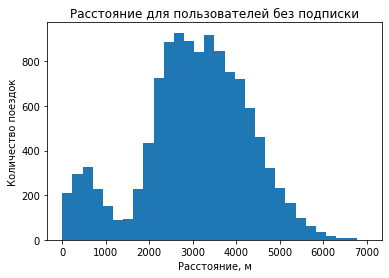

<Figure size 1440x1440 with 0 Axes>

In [30]:
# Визуализируем информацию о расстоянии для пользователей без подписки
plt.hist(free_subscription['distance'], bins=30, range = (0, 7000))
plt.title('Расстояние для пользователей без подписки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

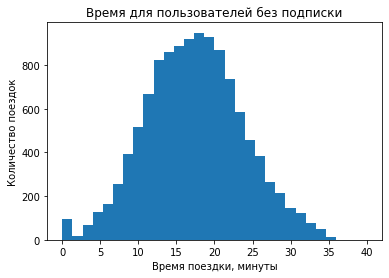

<Figure size 1440x1440 with 0 Axes>

In [31]:
# Визуализируем информацию о времени для пользователей без подписки
plt.hist(free_subscription['duration'], bins=30, range = (0, 40))
plt.title('Время для пользователей без подписки')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

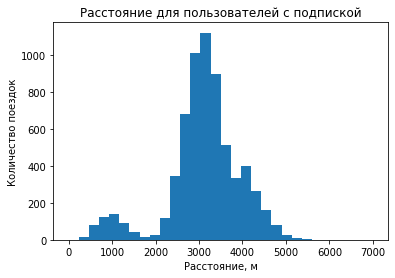

<Figure size 1440x1440 with 0 Axes>

In [32]:
# Визуализируем информацию о расстоянии для пользователей с подпиской
plt.hist(ultra_subscription['distance'], bins=30, range = (0, 7000))
plt.title('Расстояние для пользователей с подпиской')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

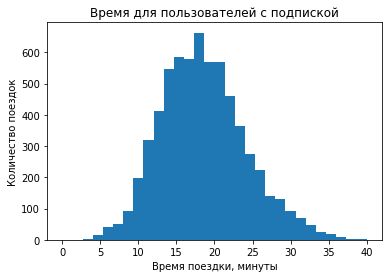

<Figure size 1440x1440 with 0 Axes>

In [33]:
# Визуализируем информацию о времени для пользователей с подпиской
plt.hist(ultra_subscription['duration'], bins=30, range = (0, 40))
plt.title('Время для пользователей с подпиской')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Объединили данные о пользователях, поездках и тарифах в один датафрейм - merged_data.

Выделили два датафрейма на основе merged_data:
 - free_subscription - Информация о пользователях с бесплатным тарифом
 - ultra_subscription - Информация о пользователях с платным тарифом
Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Пользователи без подписки совершают поездки длиной от 2 до 4.5 км и продолжительностью от 10 до 30 мин. 

Пользователи с подпиской в основном совершают поездки длиной от 3 до 3.5 км и продолжительностью от 12 до 22 мин. 

Можно сделать вывод, что пользователи без подписки совершают более долгие поездки и проезжают большие расстояния, чем пользователи с подпиской.

#### Шаг 5. Подсчёт выручки

##### Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [34]:
merged_data['duration'] = np.ceil(merged_data['duration'])
total_data = pd.pivot_table(merged_data,
                           index=['month', 'user_id'],
                           values = ['duration', 'name', 'subscription_type'],
                           aggfunc = {'duration' : sum, 
                                     'name' : len,
                                      'subscription_type': min
                                     })
total_data.rename(columns = {'name' : 'count_of_trips'}, inplace = True)
total_data.sort_values(by='month').head(20)

duration  count_of_trips subscription_type
month user_id                                            
1     1            42.0               2             ultra
      1061         43.0               3              free
      1063         10.0               1              free
      1064         15.0               1              free
      1065         99.0               4              free
      1066         19.0               1              free
      1067         22.0               1              free
      1069         53.0               3              free
      1071         15.0               1              free
      1072         11.0               1              free
      1073         16.0               1              free
      1074         22.0               1              free
      1075         29.0               3              free
      1077         13.0               1              free
      1078         19.0               1              free
      1082         30.0               2              free
      1083         31.0               2              free
      1084         25.0               1              free
      1085         63.0               3              free
      1086         18.0               1              free

##### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [35]:
def revenue_by_users(row):
    if row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['count_of_trips']
    else:
        return 199 + 6 * row['duration']

In [36]:
total_data['revenue_per_month_by_users'] = total_data.apply(revenue_by_users, axis=1)
total_data.head(30)

duration  count_of_trips subscription_type  \
month user_id                                               
1     1            42.0               2             ultra   
      3            13.0               1             ultra   
      5            13.0               1             ultra   
      7            28.0               2             ultra   
      12           33.0               1             ultra   
      13           42.0               2             ultra   
      14           35.0               2             ultra   
      15           39.0               1             ultra   
      20           29.0               1             ultra   
      22           13.0               1             ultra   
      25           17.0               1             ultra   
      26           28.0               2             ultra   
      30           25.0               2             ultra   
      32           25.0               1             ultra   
      35           57.0               3             ultra   
      42           23.0               1             ultra   
      43           48.0               2             ultra   
      44           19.0               2             ultra   
      45           27.0               2             ultra   
      46           20.0               1             ultra   
      51           55.0               2             ultra   
      54           19.0               1             ultra   
      55           37.0               2             ultra   
      56           21.0               1             ultra   
      57           26.0               1             ultra   
      60           31.0               2             ultra   
      61           59.0               4             ultra   
      63           22.0               1             ultra   
      64           25.0               1             ultra   
      66           48.0               3             ultra   

               revenue_per_month_by_users  
month user_id                              
1     1                             451.0  
      3                             277.0  
      5                             277.0  
      7                             367.0  
      12                            397.0  
      13                            451.0  
      14                            409.0  
      15                            433.0  
      20                            373.0  
      22                            277.0  
      25                            301.0  
      26                            367.0  
      30                            349.0  
      32                            349.0  
      35                            541.0  
      42                            337.0  
      43                            487.0  
      44                            313.0  
      45                            361.0  
      46                            319.0  
      51                            529.0  
      54                            313.0  
      55                            421.0  
      56                            325.0  
      57                            355.0  
      60                            385.0  
      61                            553.0  
      63                            331.0  
      64                            349.0  
      66                            487.0

Создали новый датафрейм с суммарным расстояние, количеством поездок и суммарным времем для каждого пользователя за каждый месяц.

Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки, чем пользователи на бесплатном тарифе?

Гипотеза H0 - Время пользователей с подпиской = время (duration) пользователей без подписки

Гипотеза H1 - Время пользователей с подпиской  > время (duration) пользователей без подписки

In [37]:
ultra = ultra_subscription['duration'] 

free = free_subscription['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем гипотезу H0')
else:
    print('Не удалось отвергнуть гипотезу H0')

1.2804098316645618e-34
Отвергаем гипотезу H0


Отвергли гипотезу о том, что время поездки пользователей с подпиской не превышает времени поездки пользователей без подписки.

Значит пользователи с подпиской тратят больше времени на поездки, чем без подписки. 

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Гипотеза H0 - Расстояние пользователей с подпиской = 3130 метров

Гипотеза H1 - Расстояние пользователей с подпиской > 3130 метров

In [38]:
ultra_dist = ultra_subscription['distance']

interested_value = 3130.0

alpha = .05

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем гипотезу H0')
else:
    print('Не удалось отвергнуть гипотезу H0')

0.9195368847849785
Не удалось отвергнуть гипотезу H0


Не можем отвергнуть гипотезу H0, поэтому не можем утверждать, что расстояние, которое проехали пользователи с подпиской не превышает 3130 метров.

##### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Гипотеза H0 - Выручка пользователей с подпиской = выручка пользователей без подписки

Гипотеза H1 - Выручка пользователей с подпиской > выручка пользователей без подписки

In [39]:
ultra_per_month = total_data.loc[total_data.subscription_type == 'ultra', 'revenue_per_month_by_users'] 

free_per_month = total_data.loc[total_data.subscription_type == 'free', 'revenue_per_month_by_users'] 


results = st.ttest_ind(ultra_per_month, 
                       free_per_month,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем H0')
else:
    print('Не удалось отвергнуть H0')

1.8850394384715216e-31
Отвергаем H0


Мы можем утверждать, что выручка с пользователей, имеющих подписку, превышает выручку с пользователей без подписки.

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Мне бы понадобилось использование гипотезы о равенстве средних для зависимых выборок.


Гипотеза H0 : μ1 = μ2

Гипотеза H1 : μ1 != μ2

где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

При сравнении используем метод: scipy.stats.ttest_rel()

# Вывод.

- Загрузили 3 датафрейма: информацией о пользователях, о поездках, о подписках


- Поменяли тип данных у столбца date из датафрейма data_riders к типу даты pandas


- Добавили столбец month с номером месяца


- Удалили дубликаты строк из датафрейма с пользователями


- Исследовательский анализ данных показал, что:
    - Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Больше всего пользователей в Пятигорске, меньше всего пользователей в Москве.
    - Пользователей без подписки больше, чем пользователей с подпиской
    - В основном пользователи от 20 до 30 лет. Самые младшие - дети 12 лет. Самые старшие - люди 43-х и 39 лет.
    - В основном пользователи проезжают от 2.5 до 4.5 км. Самая короткая дистанция - 860 метров, самая длинная - 7 км 211 метров.
    - В основном длительность поездки составляет 10 - 25 минут. Самые короткие поездки - поездки по половине минуты. Самые длинные поездки - по 40 минут.


- Объединили в один датафрейм данные о пользователях, поездках и подписках. На основе объединенного датафрейма создали еще 2 датафрейма: Для пользователей с подпиской и без нее.


- Визуализировали информацию о расстоянии и времени для каждого из тарифов.


- Пользователи без подписки совершают поездки длиной от 2 до 4.5 км и продолжительностью от 10 до 30 мин. 


- Пользователи с подпиской в основном совершают поездки длиной от 3 до 3.5 км и продолжительностью от 12 до 22 мин. 


- Проверили гипотезы:
    - Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
    - Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.
    - Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.